## **The Sparks Foundation**


### Data Science& Business Analytics Tasks

####  Author : Gowtham T G

#### Task 2



#### Prediction using Unsupervised ML

####  To Predict : The optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Species', ylabel='Count'>

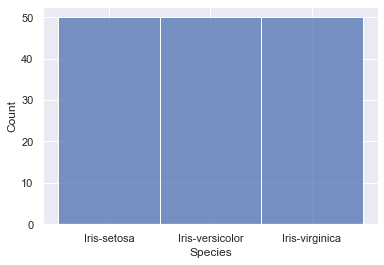

In [4]:
sns.histplot(df['Species'])

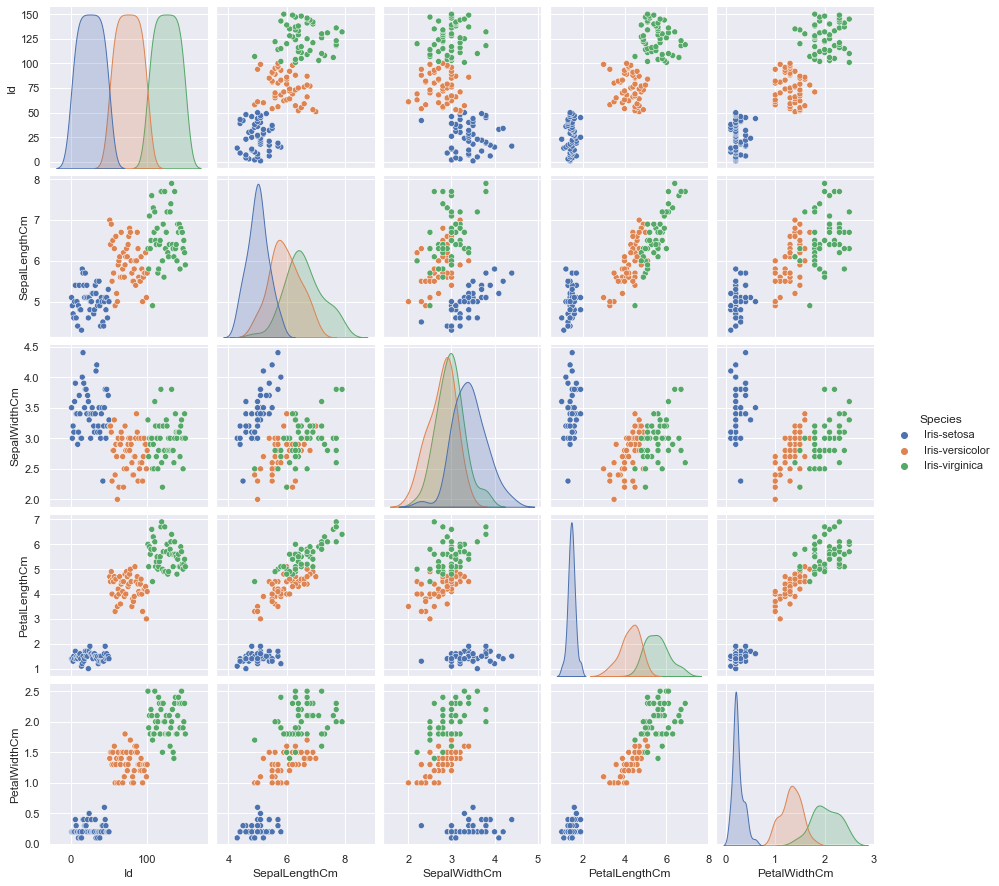

In [5]:
sns.pairplot(df,hue = "Species")

In [6]:
X = df["SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm".split(',')]

In [7]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
len(X)

150

In [9]:
len(df)

150

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
def oneHotEncoder(species):
    if species == 'Iris-setosa':
        return 0
    elif species == 'Iris-versicolor':
        return 1
    elif species == 'Iris-virginica':
        return 2
    else:
        return 3

In [12]:
Y = df['Species'].apply(lambda x : oneHotEncoder(x))

In [13]:
len(Y)

150

In [14]:
X_df = X

In [15]:
X = X_df.values

In [16]:
X_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
KNN_model.fit(X_train,y_train)
predictions=KNN_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("The Accuracy with KNN Model is " , accuracy_score(y_test,predictions))

The Accuracy with KNN Model is  0.98


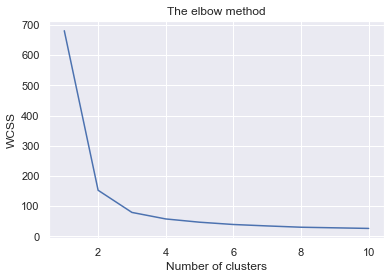

From this Graph by Elbow Meathod the Optimum number of Cluster's is 3


In [21]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)


plt.plot(range(1, 11), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()
print("From this Graph by Elbow Meathod the Optimum number of Cluster's is 3")

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

<AxesSubplot:>

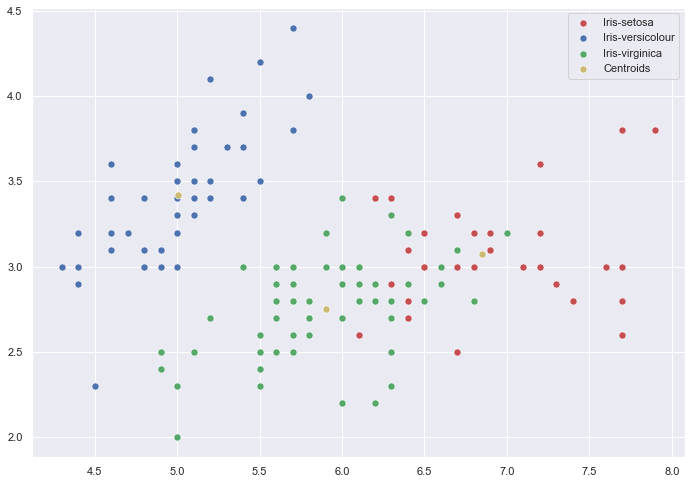

In [23]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot( ax=ax , x = X[y_kmeans == 0, 0], y = X[y_kmeans == 0, 1],
            s = 50, color = 'r', label = 'Iris-setosa')
sns.scatterplot( ax=ax,x = X[y_kmeans == 1, 0], y = X[y_kmeans == 1, 1], 
            s = 50, color = 'b', label = 'Iris-versicolour')
sns.scatterplot(ax = ax,x = X[y_kmeans == 2, 0], y = X[y_kmeans == 2, 1],
            s = 50, color = 'g', label = 'Iris-virginica')
sns.scatterplot(ax = ax, x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:,1], 
            s = 50, color = 'y', label = 'Centroids')